# <center>Women's Clothing E-Commerce Analysis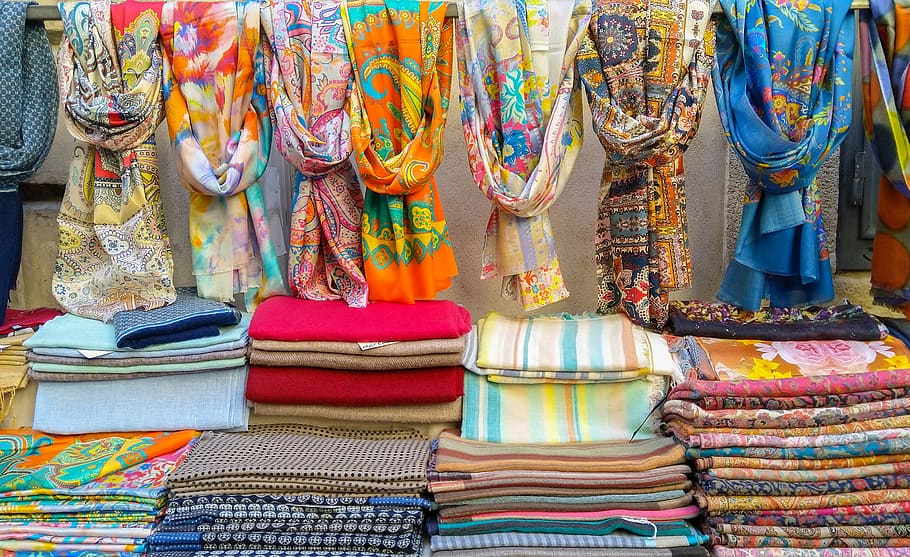

### About:
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

**Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.<br>
**Age**: Positive Integer variable of the reviewers age.<br>
**Title**: String variable for the title of the review.<br>
**Review Text**: String variable for the review body.<br>
**Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.<br>
**Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.<br>
**Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.<br>
**Division Name**: Categorical name of the product high level division.<br>
**Department Name**: Categorical name of the product department name.<br>
**Class Name**: Categorical name of the product class name.

Source: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [162]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
import plotly.express as px
import plotly.figure_factory as pff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [36]:
# Loading Dataset
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
print(data.shape)
data.head(2)

(23486, 11)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [38]:
# Finding Null Values
data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

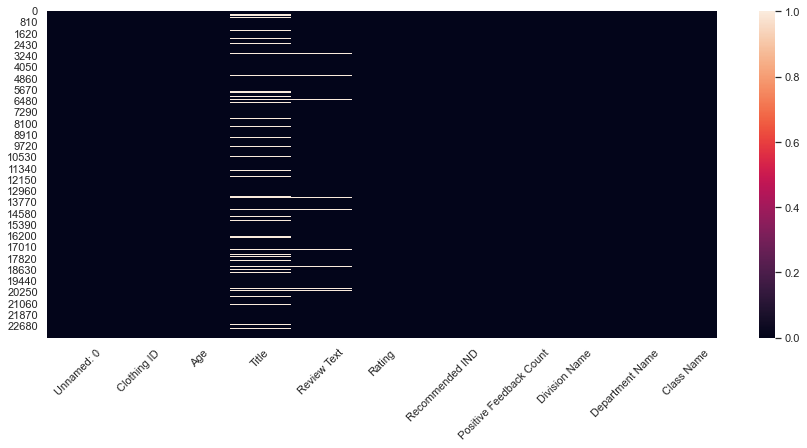

In [43]:
# Visualising Null Data
sns.set(rc={'figure.figsize':(15,6)})
ax = sns.heatmap(data.isna())
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [44]:
# Finding records belong to
data.iloc[:,8:][data.iloc[:,8:].isna().any(axis=1)].shape

(14, 3)

#### this implies that all the missing in Divison, department and class are in 3 records

In [45]:
col = ['Department Name','Class Name', 'Division Name']
for i in col:
    data[i].fillna('Random',inplace=True)

In [46]:
df = data.drop(['Unnamed: 0','Title','Review Text'], axis=1)
df.columns

Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [47]:
y = df['Clothing ID'].unique()
count=0
for i in y:
    x = list(df['Division Name'].unique())
    for j in x:
        if (True in list(df['Division Name'][df['Clothing ID']==i]==j)):
            k=i
            count+=1
    if count>=2:
        print("Already")
        break

Already


In [48]:
df[df['Clothing ID']==k].head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
1,1080,34,5,1,4,General,Dresses,Dresses
5,1080,49,2,0,4,General,Dresses,Dresses
21,1080,55,4,1,14,General,Dresses,Dresses
337,1080,74,5,1,9,General Petite,Dresses,Dresses
419,1080,32,3,1,1,General,Dresses,Dresses


In [54]:
# Describing Columns
df.iloc[:,1:].describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


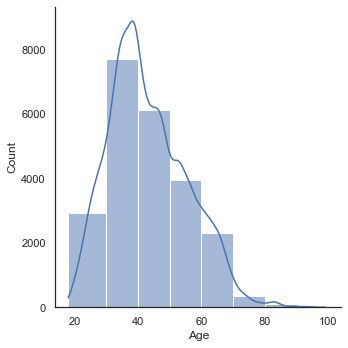

In [62]:
# Age Distribution
bins = [18,30,40,50,60,70,80,90,100]
sns.set_style('white')
sns.displot(df.Age,bins=bins, kde=True)
plt.show()

#### Young Age Group women's purchase more clothes

In [84]:
# Clothes with max purchases
df.groupby(['Clothing ID'], as_index=False)['Rating'].count().sort_values(by='Rating', ascending=False).head(10)

,Clothing ID,Rating
1078,1078,1024
862,862,806
1094,1094,756
1081,1081,582
872,872,545
829,829,527
1110,1110,480
868,868,430
895,895,404
936,936,358


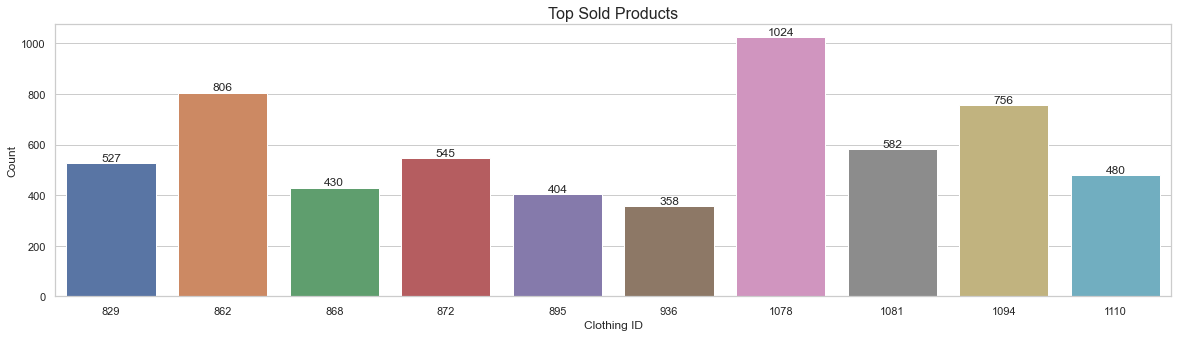

In [85]:
# Visualising the max buyes
top_clothes = df.groupby(['Clothing ID'], as_index=False)['Rating'].count().sort_values(by='Rating', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.set_style('whitegrid')
ax = sns.barplot(data = top_clothes, x = 'Clothing ID',y= 'Rating')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.ylabel("Count")
plt.title("Top Sold Products", fontsize=16)
plt.show()

In [89]:
df[df['Clothing ID']==1078].head(1)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
69,1078,56,3,0,1,General Petite,Dresses,Dresses


#### Clothes with ID 1078 has the most buyes of 1024

In [92]:
# Finding Rating Count

In [82]:
rating = df['Rating'].value_counts().sort_values(ascending=True)
recommended = df['Recommended IND'].value_counts().sort_values(ascending=False)

In [19]:
rating.index

Int64Index([1, 2, 3, 4, 5], dtype='int64')

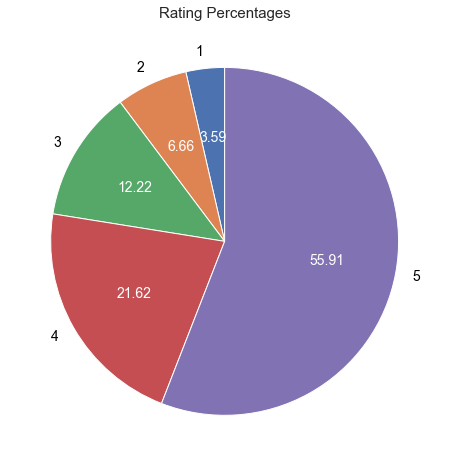

In [129]:
plt.figure(figsize=(8,8))
patches, texts, autotexts = plt.pie(rating.values, labels=rating.index, autopct='%.2f', shadow=False, startangle=90, 
        radius=1, textprops={'fontsize': 14, 'color':'white'})
[text.set_color('black') for text in texts]
plt.title("Rating Percentages", fontsize=15)
plt.show()

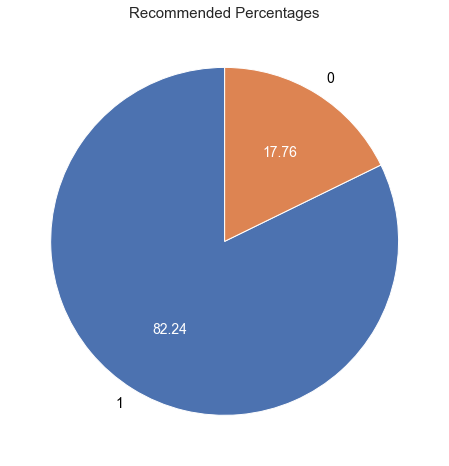

In [132]:
plt.figure(figsize=(8,8))
patches, texts, autotexts = plt.pie(recommended.values, labels=recommended.index, autopct='%.2f', shadow=False, startangle=90, 
        radius=1, textprops={'fontsize': 14,'color':'white'})
[text.set_color('black') for text in texts]
plt.title("Recommended Percentages", fontsize=15)
plt.show()

**Most the Clothes are Recommended Ones**

In [134]:
# Finding any relation between columns
df.iloc[:,1:].corr()

,Age,Rating,Recommended IND,Positive Feedback Count
Age,1.000000,0.026831,0.030622,0.043079
Rating,0.026831,1.000000,0.792336,-0.064961
Recommended IND,0.030622,0.792336,1.000000,-0.069045
Positive Feedback Count,0.043079,-0.064961,-0.069045,1.000000


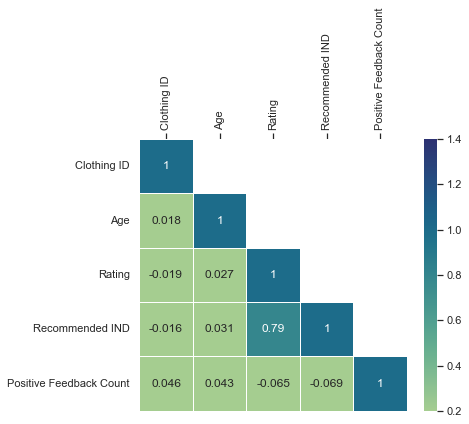

In [137]:
# Visualising
plt.figure(figsize=(6,5))
mask = np.triu(df.corr())
np.fill_diagonal(mask, False)
ax = sns.heatmap(df.corr(), mask=mask,annot=df.corr(), linewidths=0.5, cmap = "crest", vmin = 0.2, vmax=1.4)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

**Signifies that Higher Rated Products has more chances of being recommended**

In [139]:
# Which types of Products has higher demands
dep_ = df['Department Name'].value_counts()
class_ = df['Class Name'].value_counts()
div_ = df['Division Name'].value_counts()

In [145]:
fig = make_subplots(rows=2, cols=2, subplot_titles=[
                        'Division Items Count',  'Department Items Count', 'Class Items Count'], 
                    specs=[[{"type": "bar"}, {"type": "bar"}],[{"type": "bar", "colspan":2},None]])

# 1. Division Items Count
colors = ['lightslategray'] * 4
colors[0] = 'indianred'
fig.add_trace(go.Bar(x=list(div_.keys()),
             y=list(div_.values),marker_color=colors),row=1,col=1)

# 2. Department Items Count
colors = ['lightslategray'] * 7
colors[0] = 'indianred'
fig.add_trace(go.Bar(x=list(dep_.keys()),
             y=list(dep_.values), marker_color=colors),  row=1,col=2)

# 3. Class Items Count
colors = ['lightslategray'] * 21
colors[0] = 'indianred'
fig.add_trace(go.Bar(x=list(class_.keys()),
             y=list(class_.values),marker_color=colors),row=2,col=1)


fig.update_layout(
    font_family="Averta",
    hoverlabel_font_family="Averta",
    title_text="Categories Most Buyed",
    xaxis1_title_text="Divisions",
    yaxis1_title_text="Count",
    xaxis2_title_text="Departments",
    yaxis2_title_text="Count",
    xaxis3_title_text="Classes",
    yaxis3_title_text="Count",
    hoverlabel_font_size=16,
    showlegend=False,
    height=800, 
    width=1000
)
fig.update_layout(
    font=dict(size=17,family="Franklin Gothic"))

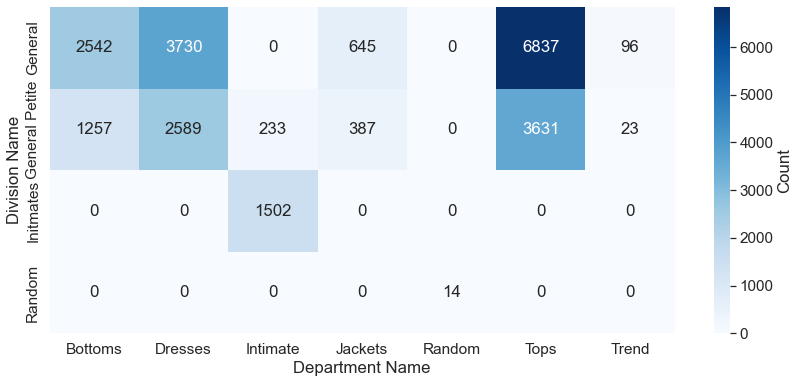

In [151]:
f, ax = plt.subplots(1,1,figsize=(14, 6), sharey=True)

tab_1 = pd.crosstab(df['Division Name'], df["Department Name"])
sns.set(font_scale=1.4)
sns.heatmap(tab_1, annot=True, ax = ax, fmt='g', cmap="Blues", cbar_kws={'label': 'Count'})
plt.show()

#### Tops are the most buyed items from General Division

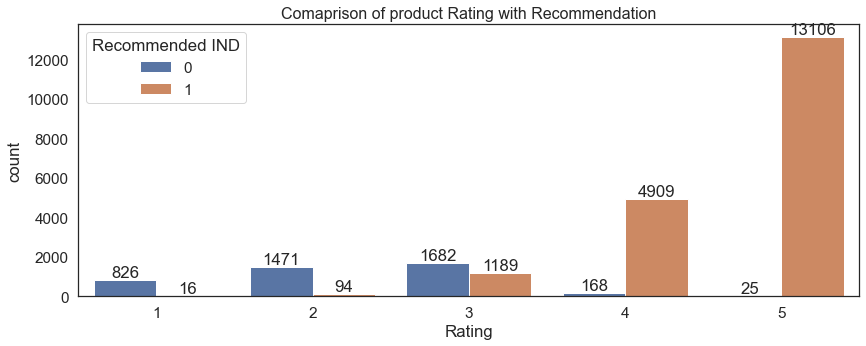

In [153]:
# Effect of Rating on Recommended

plt.figure(figsize=(14,5))
sns.set_style('white')
ax = sns.countplot(data = df, x = 'Rating', hue = 'Recommended IND')
plt.title("Comaprison of product Rating with Recommendation", fontsize=16)

for bars in ax.containers:
    ax.bar_label(bars)

**As the Rating increases Products to be Recommended also increases.**

In [155]:
new_data = data.copy()
new_data['Title_Existence'] = [0 if i is np.nan else 1 for i in data.Title]
new_data.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_Existence
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0


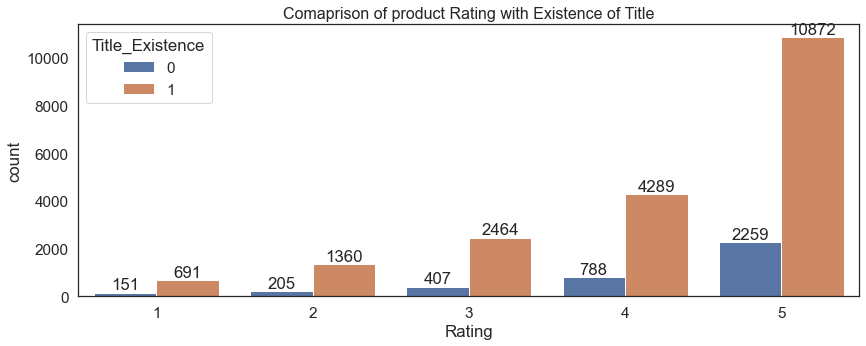

In [157]:
# Effect of Rating on Title Existence

plt.figure(figsize=(14,5))
sns.set_style('white')
ax = sns.countplot(data = new_data, x = 'Rating', hue = 'Title_Existence')
plt.title("Comaprison of product Rating with Existence of Title", fontsize=16)

for bars in ax.containers:
    ax.bar_label(bars)

**No title does not affect the Rating**

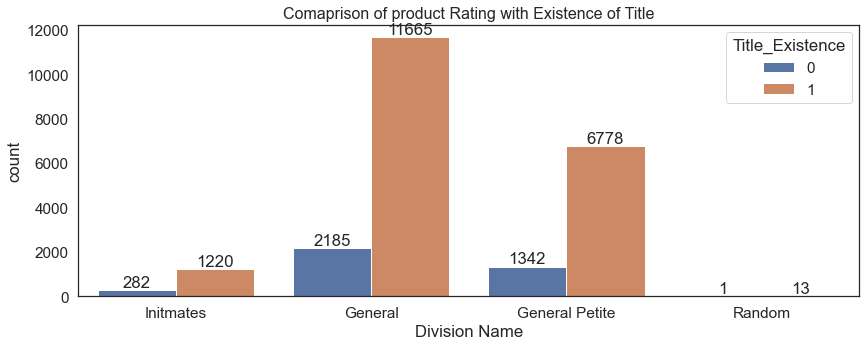

In [158]:
# Effect of Division Name on Title Existence

plt.figure(figsize=(14,5))
sns.set_style('white')
ax = sns.countplot(data = new_data, x = 'Division Name', hue = 'Title_Existence')
plt.title("Comaprison of product Rating with Existence of Title", fontsize=16)

for bars in ax.containers:
    ax.bar_label(bars)

**By looking Above graphs we can say that the missing of Title Name is total random**

In [190]:
# People finding Reviews useful
pos_feed = df['Positive Feedback Count'].value_counts().head(11)
pos_feed = pos_feed.iloc[1:]
pos_feed

1     4043
2     2193
3     1433
4      922
5      673
6      525
7      374
8      319
9      261
10     225
Name: Positive Feedback Count, dtype: int64

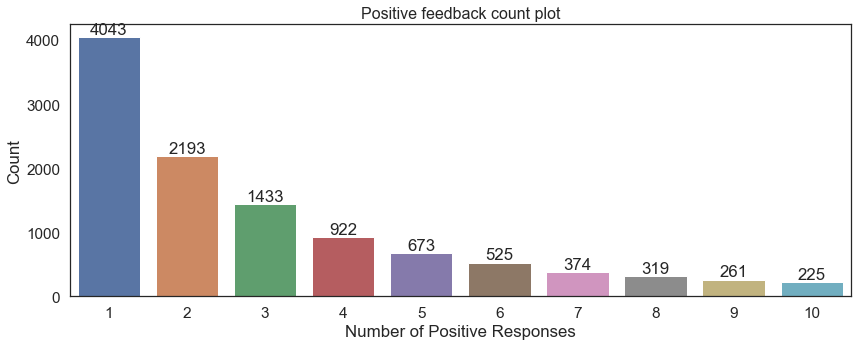

In [192]:
# Plotting Positive feedback count plot

plt.figure(figsize=(14,5))
sns.set_style('white')
ax = sns.barplot(pos_feed.index, pos_feed.values)
plt.title("Positive feedback count plot", fontsize=16)
plt.xlabel("Number of Positive Responses")
plt.ylabel("Count")
for bars in ax.containers:
    ax.bar_label(bars)

**Count of Positive feedback gradually decreases with the number of positive response increament**

In [194]:
# Top 10 Most positive feedback respnses
most_pos = df['Positive Feedback Count'].sort_values(ascending=False).head(10)
most_pos

7218     122
1294     117
7765     108
19094     99
13210     98
16329     95
2123      94
17233     93
9427      89
8683      87
Name: Positive Feedback Count, dtype: int64

In [195]:
most_pos.index

Int64Index([7218, 1294, 7765, 19094, 13210, 16329, 2123, 17233, 9427, 8683], dtype='int64')

In [200]:
# Data
df[df.index.isin(np.array(most_pos.index))].sort_values(by='Positive Feedback Count', ascending=False)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
7218,1092,34,3,1,122,General,Dresses,Dresses
1294,1095,29,5,1,117,General,Dresses,Dresses
7765,986,43,1,0,108,General,Jackets,Jackets
19094,1121,35,5,1,99,General,Jackets,Outerwear
13210,1078,23,5,1,98,General,Dresses,Dresses
16329,867,56,4,1,95,General,Tops,Knits
2123,1072,39,5,1,94,General Petite,Dresses,Dresses
17233,864,23,4,1,93,General,Tops,Knits
9427,1094,37,5,1,89,General Petite,Dresses,Dresses
8683,1078,52,4,1,87,General Petite,Dresses,Dresses


**Positive Feedback count range from 0 upto 122**

In [159]:
# Getting text insghts using Wordcloud

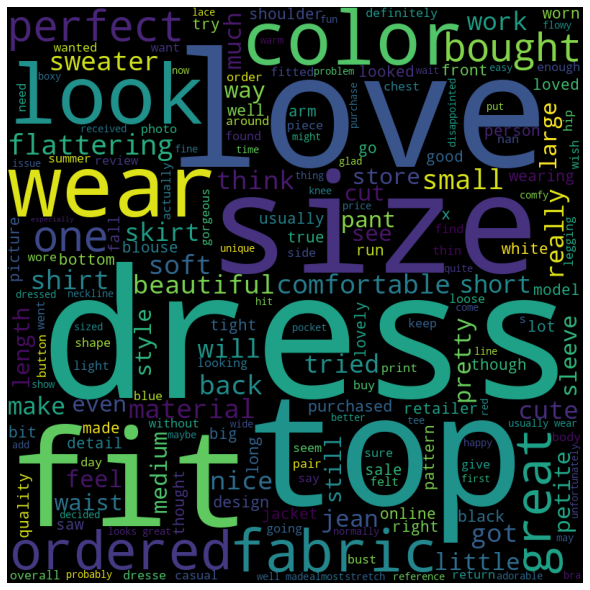

In [160]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopword = set(STOPWORDS)
 
# iterate through Column
for val in data['Review Text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='Black',
                stopwords = stopword,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [217]:
from PIL import Image

In [245]:
wine_mask = np.array(Image.open("photo3.png"))
wine_mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [250]:
def transform_format(val):
    if val == 1:
        return 255
    else:
        return val

In [251]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [252]:
# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

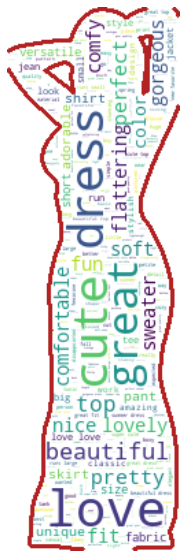

In [253]:
comment_words = ''
stopword = set(STOPWORDS)
stopword.add('nan')
 
# iterate through Column
for val in data['Title']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    
    
# Create a word cloud image
wc = WordCloud(width = 800, height = 800,background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopword, contour_width=2, contour_color='firebrick',min_font_size = 1)

# Generate a wordcloud
wc.generate(comment_words)

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
